In [16]:
# =========================
# Imports and Data
# =========================
import random
import copy
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load city coordinates
cities = pd.read_csv("data/cities.csv")
coords = cities[['X', 'Y']].values
N = len(coords)

# Compute distance matrix
dist_matrix = np.sqrt(((coords[:, None, :] - coords[None, :, :])**2).sum(axis=2))


In [17]:
# =========================
# Individual Representation
# =========================
class Individual:
    def __init__(self, gene):
        self.gene = gene
        self.fitness = 0

# =========================
# Fitness Function
# =========================
def total_distance(ind):
    route = ind.gene
    dist = sum(dist_matrix[route[i], route[i+1]] for i in range(len(route)-1))
    dist += dist_matrix[route[-1], route[0]]  # Return to start
    return dist

# =========================
# Selection (Tournament)
# =========================
def selection(population):
    P = len(population)
    new_pop = []
    for _ in range(P):
        i1, i2 = random.sample(range(P), 2)
        winner = population[i1] if population[i1].fitness < population[i2].fitness else population[i2]
        new_pop.append(copy.deepcopy(winner))
    return new_pop

# =========================
# Crossover (Ordered Crossover)
# =========================
def crossover(parents):
    P = len(parents)
    N = len(parents[0].gene)
    offspring = []
    for i in range(0, P, 2):
        p1, p2 = parents[i], parents[i+1]
        a, b = sorted(random.sample(range(N), 2))
        child1_gene = [None]*N
        child2_gene = [None]*N
        child1_gene[a:b] = p1.gene[a:b]
        child2_gene[a:b] = p2.gene[a:b]
        def fill_remaining(child, parent):
            parent_cities = [c for c in parent.gene if c not in child]
            return [c if c is not None else parent_cities.pop(0) for c in child]
        child1_gene = fill_remaining(child1_gene, p2)
        child2_gene = fill_remaining(child2_gene, p1)
        offspring.append(Individual(child1_gene))
        offspring.append(Individual(child2_gene))
    return offspring

# =========================
# Mutation (Swap)
# =========================
def mutation(offspring, MUTRATE=0.1):
    N = len(offspring[0].gene)
    for ind in offspring:
        if random.random() < MUTRATE:
            a, b = random.sample(range(N), 2)
            ind.gene[a], ind.gene[b] = ind.gene[b], ind.gene[a]
    return offspring


Gen 0: Best = 2216.84, Average = 2619.05, Worst = 2968.11
Gen 50: Best = 1841.06, Average = 2149.07, Worst = 2448.91
Gen 100: Best = 1688.11, Average = 1993.72, Worst = 2244.32
Gen 150: Best = 1158.07, Average = 1251.83, Worst = 1445.89
Gen 200: Best = 987.72, Average = 1012.36, Worst = 1245.34
Gen 250: Best = 914.52, Average = 980.76, Worst = 1271.82
Gen 300: Best = 896.35, Average = 919.04, Worst = 1189.72
Gen 350: Best = 816.81, Average = 841.88, Worst = 1174.95
Gen 400: Best = 780.84, Average = 820.10, Worst = 952.99
Gen 450: Best = 712.09, Average = 722.97, Worst = 1014.79
Gen 500: Best = 698.59, Average = 712.61, Worst = 1034.59
Gen 550: Best = 682.96, Average = 716.82, Worst = 1001.66
Gen 600: Best = 682.96, Average = 701.06, Worst = 941.33
Gen 650: Best = 673.30, Average = 716.39, Worst = 1072.72
Gen 700: Best = 673.30, Average = 686.13, Worst = 975.67
Gen 750: Best = 667.37, Average = 695.17, Worst = 962.53
Gen 800: Best = 667.37, Average = 674.24, Worst = 878.89
Gen 850: Best

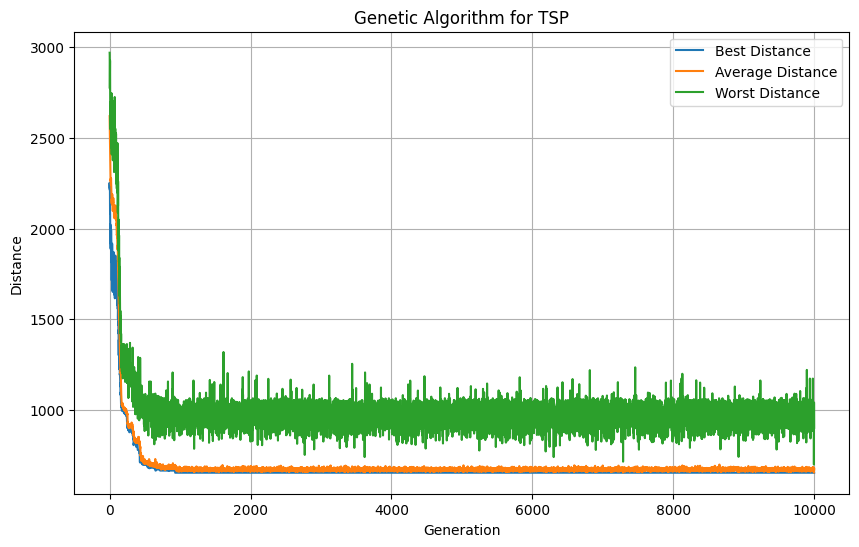

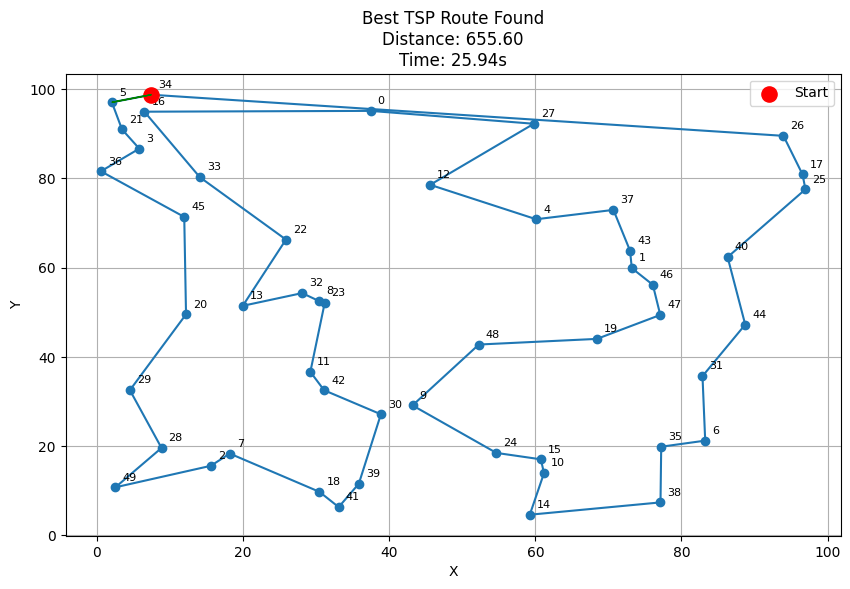


GA results saved to ga_single_run_results.txt


In [18]:
# =========================
# GA Parameters
# =========================
P = 100           # Population size
MUTRATE = 0.1     # Mutation rate
maxGeneration = 10000

# =========================
# Initialize Population
# =========================
population = []
for _ in range(P):
    gene = random.sample(range(N), N)
    ind = Individual(gene)
    ind.fitness = total_distance(ind)
    population.append(ind)

# =========================
# GA Main Loop
# =========================
bestFitness = []
averageFitness = []
worstFitness = []

start_time = time.time()

for gen in range(maxGeneration):
    offspring = selection(population)
    offspring = crossover(offspring)
    offspring = mutation(offspring, MUTRATE)
    
    for ind in offspring:
        ind.fitness = total_distance(ind)
    
    population = offspring
    best = min(population, key=lambda x: x.fitness)
    avg = np.mean([ind.fitness for ind in population])
    worst = max(population, key=lambda x: x.fitness)
    
    bestFitness.append(best.fitness)
    averageFitness.append(avg)
    worstFitness.append(worst.fitness)
    
    if gen % 50 == 0:
        print(f"Gen {gen}: Best = {best.fitness:.2f}, Average = {avg:.2f}, Worst = {worst.fitness:.2f}")

end_time = time.time()
computation_time = end_time - start_time

# =========================
# Display Results
# =========================
best_solution = min(population, key=lambda x: x.fitness)
print(f"\nBest route distance found: {best_solution.fitness:.2f}")
print("Best route:", best_solution.gene)
print(f"Computation time: {computation_time:.2f} seconds")

# =========================
# Plot GA Statistics
# =========================
plt.figure(figsize=(10,6))
plt.plot(bestFitness, label='Best Distance')
plt.plot(averageFitness, label='Average Distance')
plt.plot(worstFitness, label='Worst Distance')
plt.xlabel('Generation')
plt.ylabel('Distance')
plt.title('Genetic Algorithm for TSP')
plt.legend()
plt.grid(True)
plt.show()

# =========================
# Plot Best Route
# =========================
best_route = best_solution.gene + [best_solution.gene[0]]
x = [coords[i][0] for i in best_route]
y = [coords[i][1] for i in best_route]

plt.figure(figsize=(10,6))
plt.plot(x, y, marker='o', linestyle='-')
plt.title(f'Best TSP Route Found\nDistance: {best_solution.fitness:.2f}\nTime: {computation_time:.2f}s')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

for i, city_index in enumerate(best_route[:-1]):
    plt.annotate(str(city_index), (coords[city_index][0], coords[city_index][1]),
                 textcoords="offset points", xytext=(5,5), fontsize=8, color='black')

first_city = best_route[0]
plt.scatter(coords[first_city][0], coords[first_city][1], color='red', s=120, zorder=5, label='Start')

second_city = best_route[1]
plt.arrow(coords[first_city][0], coords[first_city][1],
          coords[second_city][0] - coords[first_city][0],
          coords[second_city][1] - coords[first_city][1],
          color='green', width=0.002, head_width=0.03, length_includes_head=True, zorder=6)

plt.legend()
plt.show()

# =========================
# Save GA Results to Text File
# =========================
with open("ga_single_run_results.txt", "w") as f:
    f.write("Genetic Algorithm (GA) Single Run Results\n")
    f.write("=========================================\n\n")
    f.write(f"Population size: {P}\n")
    f.write(f"Mutation rate: {MUTRATE}\n")
    f.write(f"Generations: {maxGeneration}\n")
    f.write(f"Total computation time: {computation_time:.2f} seconds\n\n")

    f.write(f"Best route distance found: {best_solution.fitness:.2f}\n")
    f.write("Best route (city indices in order):\n")
    f.write(" -> ".join(map(str, best_solution.gene)) + "\n\n")

    f.write("Convergence Summary (every 50 generations):\n")
    f.write("-----------------------------------------\n")
    for i in range(0, maxGeneration, 50):
        if i < len(bestFitness):
            f.write(f"Gen {i:5d}: Best = {bestFitness[i]:.2f}, "
                    f"Avg = {averageFitness[i]:.2f}, "
                    f"Worst = {worstFitness[i]:.2f}\n")

print("\nGA results saved to ga_single_run_results.txt")


In [19]:
# ==============================
# HYPERPARAMETER TUNING: GENETIC ALGORITHM
# ==============================
population_sizes = [20, 50, 100]       # Population sizes to test
mutation_rates = [0.05, 0.1, 0.2]      # Mutation rates
generation_counts = [2000, 5000, 10000] # Number of generations

best_overall_distance = float('inf')
best_params = {}
best_solution_overall = None

for P in population_sizes:
    for MUTRATE in mutation_rates:
        for maxGeneration in generation_counts:
            print(f"Testing P={P}, MUTRATE={MUTRATE}, GENERATIONS={maxGeneration}...")

            # Initialize population
            population = [Individual(random.sample(range(N), N)) for _ in range(P)]
            for ind in population:
                ind.fitness = total_distance(ind)

            bestFitness = []

            # Start timing this configuration
            start_time = time.time()

            # GA evolution loop
            for gen in range(maxGeneration):
                offspring = selection(population)
                offspring = crossover(offspring)
                offspring = mutation(offspring, MUTRATE)

                # Evaluate offspring
                for ind in offspring:
                    ind.fitness = total_distance(ind)

                population = offspring
                best = min(population, key=lambda x: x.fitness)
                bestFitness.append(best.fitness)

            # End timing
            end_time = time.time()
            computation_time = end_time - start_time

            print(f"  Best distance: {best.fitness:.2f}")
            print(f"  Runtime: {computation_time:.2f} seconds\n")

            # Track best overall configuration
            if best.fitness < best_overall_distance:
                best_overall_distance = best.fitness
                best_params = {
                    "P": P,
                    "MUTRATE": MUTRATE,
                    "GENERATIONS": maxGeneration
                }
                best_solution_overall = best

# ==============================
# Display Best Hyperparameters
# ==============================
print("========== BEST HYPERPARAMETERS ==========")
print(f"P: {best_params['P']}")
print(f"MUTRATE: {best_params['MUTRATE']}")
print(f"GENERATIONS: {best_params['GENERATIONS']}")
print(f"Best Distance Found: {best_overall_distance:.2f}")
print(f"Best Route: {best_solution_overall.gene}")

# ==============================
# Save Results to Text File
# ==============================
with open("ga_hyperparameters_best_route.txt", "w") as f:
    f.write(f"Best Distance Found: {best_overall_distance:.2f}\n")
    f.write("Best Hyperparameters:\n")
    f.write(f"  P: {best_params['P']}\n")
    f.write(f"  MUTRATE: {best_params['MUTRATE']}\n")
    f.write(f"  GENERATIONS: {best_params['GENERATIONS']}\n")
    f.write("Best Route (city indices in order):\n")
    f.write(" -> ".join(map(str, best_solution_overall.gene)) + "\n")

print("Best route and hyperparameters saved to ga_hyperparameters_best_route.txt")


Testing P=20, MUTRATE=0.05, GENERATIONS=2000...
  Best distance: 919.61
  Runtime: 1.07 seconds

Testing P=20, MUTRATE=0.05, GENERATIONS=5000...
  Best distance: 933.39
  Runtime: 2.60 seconds

Testing P=20, MUTRATE=0.05, GENERATIONS=10000...
  Best distance: 779.34
  Runtime: 5.22 seconds

Testing P=20, MUTRATE=0.1, GENERATIONS=2000...
  Best distance: 886.92
  Runtime: 1.05 seconds

Testing P=20, MUTRATE=0.1, GENERATIONS=5000...
  Best distance: 770.30
  Runtime: 2.61 seconds

Testing P=20, MUTRATE=0.1, GENERATIONS=10000...
  Best distance: 740.78
  Runtime: 5.22 seconds

Testing P=20, MUTRATE=0.2, GENERATIONS=2000...
  Best distance: 767.03
  Runtime: 1.05 seconds

Testing P=20, MUTRATE=0.2, GENERATIONS=5000...
  Best distance: 638.20
  Runtime: 2.64 seconds

Testing P=20, MUTRATE=0.2, GENERATIONS=10000...
  Best distance: 831.59
  Runtime: 5.24 seconds

Testing P=50, MUTRATE=0.05, GENERATIONS=2000...
  Best distance: 819.16
  Runtime: 2.60 seconds

Testing P=50, MUTRATE=0.05, GENER

Run 1: Best Distance = 667.54, Computation Time = 25.94 seconds
Run 2: Best Distance = 745.31, Computation Time = 25.81 seconds
Run 3: Best Distance = 717.39, Computation Time = 26.06 seconds
Run 4: Best Distance = 716.55, Computation Time = 25.86 seconds
Run 5: Best Distance = 761.64, Computation Time = 25.87 seconds
Run 6: Best Distance = 685.46, Computation Time = 25.90 seconds
Run 7: Best Distance = 695.48, Computation Time = 25.80 seconds
Run 8: Best Distance = 711.03, Computation Time = 88.53 seconds
Run 9: Best Distance = 697.35, Computation Time = 25.98 seconds
Run 10: Best Distance = 652.91, Computation Time = 25.90 seconds

Multi-run GA statistics:
Mean best distance: 705.0655199016826
Std deviation: 31.31090310381022
Best distance overall: 652.9061466665278
Worst distance overall: 761.6378238731583
Mean computation time per run: 32.16 seconds
Total experiment time (all 10 runs): 321.67 seconds

Multi-run results saved to 'ga_multi_run_results.txt'


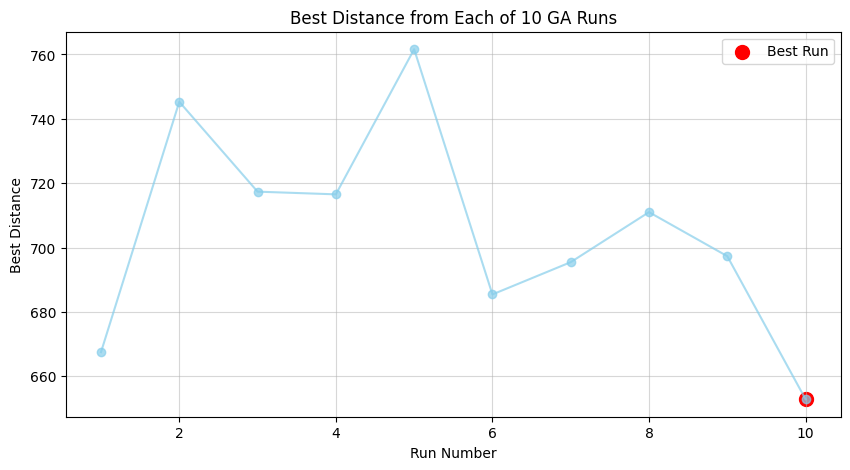

In [20]:
# =========================
# GA Parameters
# =========================
P = 200
MUTRATE = 0.1
maxGeneration = 5000
num_runs = 10  # Number of independent GA runs

# =========================
# Multi-Run GA
# =========================
best_distances = []
all_bestFitness = []
run_times = []

experiment_start = time.time()
for run in range(num_runs):
    # Initialize population
    population = [Individual(random.sample(range(N), N)) for _ in range(P)]
    for ind in population:
        ind.fitness = total_distance(ind)

    bestFitness = []

    start_time = time.time()
    
    for gen in range(maxGeneration):
        offspring = selection(population)
        offspring = crossover(offspring)
        offspring = mutation(offspring, MUTRATE)
        
        for ind in offspring:
            ind.fitness = total_distance(ind)
        
        population = offspring
        best = min(population, key=lambda x: x.fitness)
        bestFitness.append(best.fitness)
    
    end_time = time.time()
    computation_time = end_time - start_time
    run_times.append(computation_time)

    best_solution = min(population, key=lambda x: x.fitness)
    best_distances.append(best_solution.fitness)
    all_bestFitness.append(bestFitness)

    print(f"Run {run+1}: Best Distance = {best_solution.fitness:.2f}, Computation Time = {computation_time:.2f} seconds")

experiment_end = time.time()
experiment_time = experiment_end - experiment_start

# =========================
# Multi-Run Statistics
# =========================
mean_best = np.mean(best_distances)
std_best = np.std(best_distances)
best_overall = np.min(best_distances)
worst_overall = np.max(best_distances)
mean_time = np.mean(run_times)

print("\nMulti-run GA statistics:")
print("Mean best distance:", mean_best)
print("Std deviation:", std_best)
print("Best distance overall:", best_overall)
print("Worst distance overall:", worst_overall)
print(f"Mean computation time per run: {mean_time:.2f} seconds")
print(f"Total experiment time (all {num_runs} runs): {experiment_time:.2f} seconds")

# =========================
# Save Multi-Run Results to File
# =========================
output_file = "ga_multi_run_results.txt"

with open(output_file, "w") as f:
    f.write("Multi-Run GA Results\n")
    f.write("===================\n")
    f.write(f"Number of Runs: {num_runs}\n")
    f.write(f"Population Size: {P}, Mutation Rate: {MUTRATE}, Generations: {maxGeneration}\n\n")
    for i, dist in enumerate(best_distances):
        f.write(f"Run {i+1}: Best Distance = {dist:.2f}, Computation Time = {run_times[i]:.2f} seconds\n")
    f.write("\nMulti-Run Statistics:\n")
    f.write(f"Mean Best Distance: {mean_best:.2f}\n")
    f.write(f"Std Deviation: {std_best:.2f}\n")
    f.write(f"Best Distance Overall: {best_overall:.2f}\n")
    f.write(f"Worst Distance Overall: {worst_overall:.2f}\n")
    f.write(f"Mean Computation Time per Run: {mean_time:.2f} seconds\n")
    f.write(f"Total Experiment Time: {experiment_time:.2f} seconds\n")

print(f"\nMulti-run results saved to '{output_file}'")

# =========================
# Optional: Plot convergence of all runs
# =========================
plt.figure(figsize=(10,5))
plt.plot(range(1, num_runs+1), best_distances, marker='o', linestyle='-', color='skyblue', alpha=0.7)

best_idx = np.argmin(best_distances)
plt.scatter(best_idx+1, best_distances[best_idx], color='red', s=100, label='Best Run')

plt.xlabel("Run Number")
plt.ylabel("Best Distance")
plt.title(f"Best Distance from Each of {num_runs} GA Runs")
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()



Scalability Test Results:
 Problem Size  Best Distance  Average Distance  Computation Time (s)
           10         290.31            290.31                  7.84
           20         386.43            409.62                 11.41
           30         488.67            531.21                 15.55
           40         527.20            583.39                 20.40
           50         645.28            688.51                 74.46


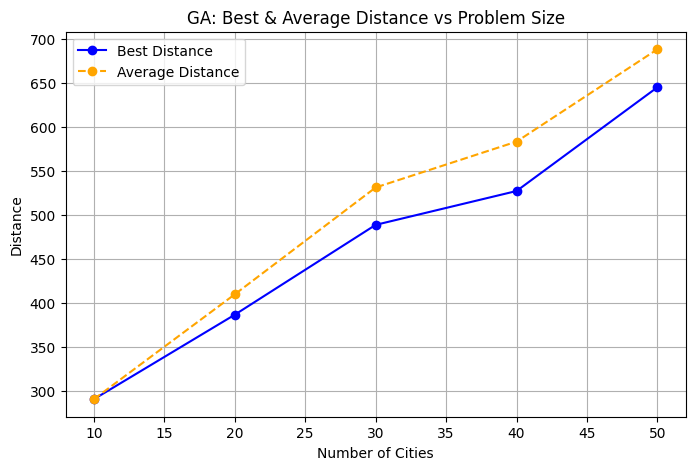

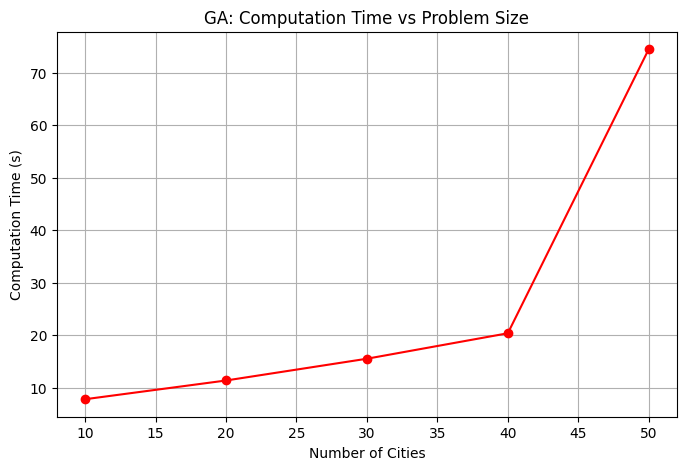


Scalability results saved to ga_scalability_results.txt


In [22]:
# ==============================
# Scalability Test: GA with Different City Sizes
# ==============================
P = 200
MUTRATE = 0.1
maxGeneration = 5000
NUM_RUNS = 10  # number of independent GA runs per city size

CITY_SIZES = [10, 20, 30, 40, 50]
scalability_results = []

for size in CITY_SIZES:
    coords_subset = coords[:size]
    N = size

    best_distances = []
    avg_distances = []
    run_times = []
    best_routes = []

    for run in range(NUM_RUNS):
        # Initialize population
        population = [Individual(random.sample(range(N), N)) for _ in range(P)]
        for ind in population:
            ind.fitness = total_distance(ind)

        start_time = time.time()

        # Run GA evolution
        for gen in range(maxGeneration):
            offspring = selection(population)
            offspring = crossover(offspring)
            offspring = mutation(offspring, MUTRATE=MUTRATE)
            for ind in offspring:
                ind.fitness = total_distance(ind)
            population = offspring

        end_time = time.time()
        computation_time = end_time - start_time
        run_times.append(computation_time)

        best_solution = min(population, key=lambda x: x.fitness)
        best_distances.append(best_solution.fitness)
        best_routes.append(best_solution.gene)

    # Compute statistics for this city size
    mean_distance = np.mean(best_distances)
    best_index = np.argmin(best_distances)
    best_overall = best_distances[best_index]
    best_route = best_routes[best_index]
    mean_time = np.mean(run_times)

    scalability_results.append({
        "Problem Size": size,
        "Best Distance": best_overall,
        "Average Distance": mean_distance,
        "Computation Time (s)": mean_time,
        "Best Route": best_route
    })

# ==============================
# Display scalability results
# ==============================
results_df = pd.DataFrame(scalability_results)
print("\nScalability Test Results:")
print(results_df[["Problem Size", "Best Distance", "Average Distance", "Computation Time (s)"]].to_string(index=False, float_format="%.2f"))

# ==============================
# Plot Best & Average Distance vs Problem Size
# ==============================
plt.figure(figsize=(8,5))
plt.plot(results_df["Problem Size"], results_df["Best Distance"], marker='o', linestyle='-', color='blue', label='Best Distance')
plt.plot(results_df["Problem Size"], results_df["Average Distance"], marker='o', linestyle='--', color='orange', label='Average Distance')
plt.xlabel("Number of Cities")
plt.ylabel("Distance")
plt.title("GA: Best & Average Distance vs Problem Size")
plt.legend()
plt.grid(True)
plt.show()

# ==============================
# Plot Computation Time vs Problem Size
# ==============================
plt.figure(figsize=(8,5))
plt.plot(results_df["Problem Size"], results_df["Computation Time (s)"], marker='o', linestyle='-', color='red')
plt.xlabel("Number of Cities")
plt.ylabel("Computation Time (s)")
plt.title("GA: Computation Time vs Problem Size")
plt.grid(True)
plt.show()

# ==============================
# Save scalability results to text file
# ==============================
with open("ga_scalability_results.txt", "w") as f:
    f.write("Scalability Test: GA with Different City Sizes\n")
    f.write("=============================================\n\n")
    for result in scalability_results:
        f.write(f"Number of Cities: {result['Problem Size']}\n")
        f.write(f"Best Distance: {result['Best Distance']:.2f}\n")
        f.write(f"Average Distance: {result['Average Distance']:.2f}\n")
        f.write(f"Average Computation Time (s): {result['Computation Time (s)']:.2f}\n")
        f.write("Best Route (city indices in order):\n")
        f.write(" -> ".join(map(str, result['Best Route'])) + "\n\n")

print("\nScalability results saved to ga_scalability_results.txt")
